# Setup jupyter notebook interactive plots

In [2]:
# Make plotting interative in the notebook.
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

# Create a BlueSky 'RunEngine'

In [3]:
# Create a RunEngine.
from bluesky import RunEngine
RE = RunEngine({})

# Setup 'BestEffortCallback to guess how to display scans

In [4]:
from bluesky.callbacks.best_effort import BestEffortCallback
RE.subscribe(BestEffortCallback())

0

# Example: Motor and AI objects

In [5]:
from ophyd.alssignal import ALSMotor, ALSAI
fakemotor = ALSMotor('fake')
monitor = ALSAI('Current Monitor 1')

In [6]:
monitor.get()

0.050626

In [7]:
import time
status=fakemotor.set(3.14)
print(status)
time.sleep(1)
print(status)
fakemotor.get()

Status(obj=ALSDACSignal(name='fake'), done=False, success=False)
Status(obj=ALSDACSignal(name='fake'), done=True, success=True)


3.14

# Example: scans

Transient Scan ID: 1     Time: 2017/12/18 12:43:23
Persistent Unique Scan ID: '306c78dd-1389-48c7-a39c-442dec226bcb'
New stream: 'primary'
+-----------+------------+------------+-------------------+
|   seq_num |       time |       fake | Current Monitor 1 |
+-----------+------------+------------+-------------------+


<IPython.core.display.Javascript object>


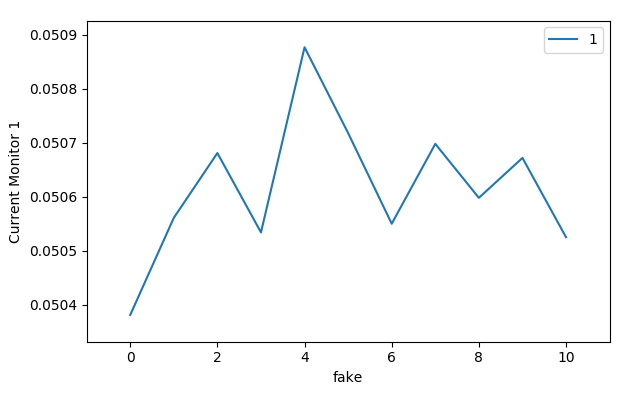

|         1 | 12:43:23.5 |      0.000 |             0.050 |
|         2 | 12:43:23.8 |      1.000 |             0.051 |
|         3 | 12:43:24.0 |      2.000 |             0.051 |
|         4 | 12:43:24.3 |      3.000 |             0.051 |
|         5 | 12:43:24.6 |      4.000 |             0.051 |
|         6 | 12:43:24.9 |      5.000 |             0.051 |
|         7 | 12:43:25.2 |      6.000 |             0.051 |
|         8 | 12:43:25.6 |      7.000 |             0.051 |
|         9 | 12:43:25.8 |      8.000 |             0.051 |
|        10 | 12:43:26.1 |      9.000 |             0.051 |
|        11 | 12:43:26.4 |     10.000 |             0.051 |
+-----------+------------+------------+-------------------+
generator scan ['306c78'] (scan num: 1)





('306c78dd-1389-48c7-a39c-442dec226bcb',)

In [7]:
from bluesky.plans import scan, count
from bluesky.callbacks import LiveTable, LivePlot
RE(scan([monitor], fakemotor, 0, 10, 11, md={'sample_name':'Fake Sample 1'}))

In [8]:
RE.resume()

TransitionError: The RunEngine is the idle state. You can only resume for the paused state.

# Example: Suspenders and Callbacks

In [9]:
from bluesky.suspenders import SuspendFloor
sus = SuspendFloor(monitor, 0.0505, sleep=1)
RE.install_suspender(sus)

Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 12:43:32.
Transient Scan ID: 2     Time: 2017/12/18 12:43:31
Persistent Unique Scan ID: '166f740f-12f7-4458-8d6d-e5dd19d8f35a'
New stream: 'primary'
+-----------+------------+-------------------+
|   seq_num |       time | Current Monitor 1 |
+-----------+------------+-------------------+


<IPython.core.display.Javascript object>


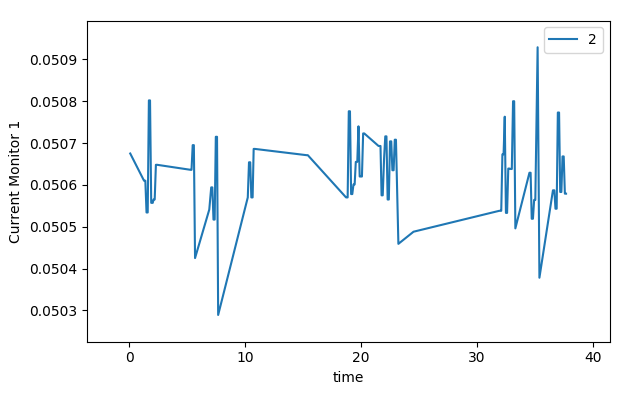

|         1 | 12:43:31.7 |             0.051 |
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 12:43:31.
Justification for this suspension:
Signal Current Monitor 1 = 0.050493 is below 0.0505
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 12:43:32.
|         2 | 12:43:32.8 |             0.051 |
|         3 | 12:43:32.9 |             0.051 |
|         4 | 12:43:33.0 |             0.051 |
|         5 | 12:43:33.1 |             0.051 |
|         6 | 12:43:33.2 |             0.051 |
|         7 | 12:43:33.3 |             0.051 |
|         8 | 12:43:33.4 |             0.051 |
|         9 | 12:43:33.5 |             0.051 |
|        10 | 12:43:33.6 |             0.051 |
|        11 | 12:43:33.7 |             0.051 |
|        12 | 12:43:33.8 |             0.051 |
|        13 | 12:43:

Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 12:43:49.
Justification for this suspension:
Signal Current Monitor 1 = 0.050442 is below 0.0505
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 12:43:50.
|        33 | 12:43:50.3 |             0.051 |
|        34 | 12:43:50.3 |             0.051 |
|        35 | 12:43:50.4 |             0.051 |
|        36 | 12:43:50.5 |             0.051 |
|        37 | 12:43:50.6 |             0.051 |
|        38 | 12:43:50.7 |             0.051 |
|        39 | 12:43:50.8 |             0.051 |
|        40 | 12:43:50.9 |             0.051 |
|        41 | 12:43:51.0 |             0.051 |
|        42 | 12:43:51.1 |             0.051 |
|        43 | 12:43:51.2 |             0.051 |
|        44 | 12:43:51.3 |             0.051 |
|        45 | 12:43:

|        80 | 12:44:06.1 |             0.051 |
|        81 | 12:44:06.2 |             0.051 |
|        82 | 12:44:06.3 |             0.051 |
|        83 | 12:44:06.4 |             0.051 |
|        84 | 12:44:06.5 |             0.051 |
|        85 | 12:44:06.6 |             0.051 |
|        86 | 12:44:06.8 |             0.051 |
|        87 | 12:44:06.9 |             0.050 |
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 12:44:07.
Justification for this suspension:
Signal Current Monitor 1 = 0.050378 is below 0.0505
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 12:44:08.
|        88 | 12:44:08.1 |             0.051 |
|        89 | 12:44:08.1 |             0.051 |
|        90 | 12:44:08.2 |             0.051 |
|        91 | 12:44:08.3 |             0.051 |
|        92 | 12:44:

('166f740f-12f7-4458-8d6d-e5dd19d8f35a',)

In [10]:
RE(count([monitor], num=100, delay=.1))

In [12]:
monitor.subscribe(lambda value,**kwargs:print(value))

0.050542
0.050542
0.050542
0.050542
0.050542
0.050745
0.050745


2

0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050745
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050422
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050655
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050607
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.050562
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.05067
0.

0.050802
0.050802
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050545
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050719
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050743
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050552
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050678
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050501
0.050821
0